In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime


%load_ext autoreload
%autoreload 2

# Load the data

In [59]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [60]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [61]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    e = y - np.dot(tx,w)
    MSE = (1/(2 *y.shape[0]))* np.dot (e.T,e)
    return(MSE)
    # ***************************************************


# 2. Grid Search

Fill in the function `grid_search()` below:

In [62]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    num_grid_pts_w0 = grid_w0.shape[0]
    num_grid_pts_w1 = grid_w1.shape[0]
    for i in range(num_grid_pts_w0):
        for j in range(num_grid_pts_w1):
            w = np.array([grid_w0[i], grid_w1[j]])
            losses[i, j] = compute_loss(y, tx, w)
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=5.795 seconds


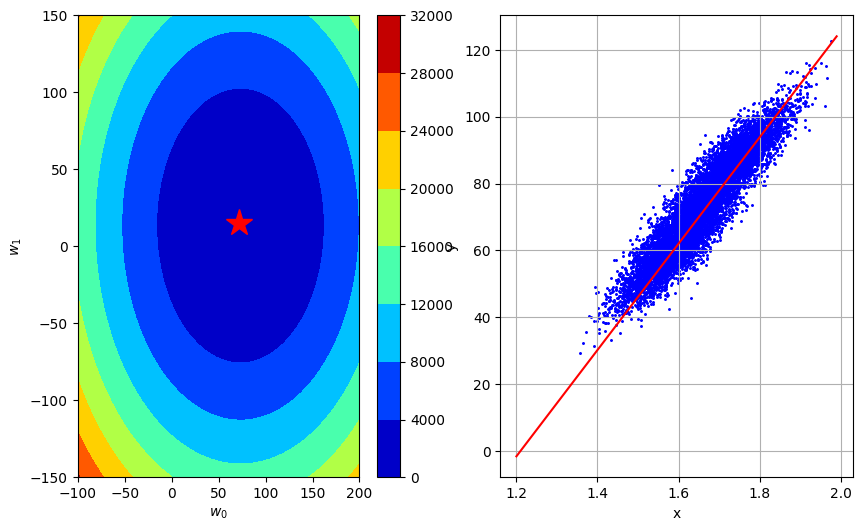

In [63]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization


# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [64]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    e = y - np.dot(tx,w)
    grad = -1/y.shape[0]* np.dot(e.T,tx)
    return(grad)
    # ***************************************************
    raise NotImplementedError

In [65]:
gradient = compute_gradient(y, tx, [100,20])
print("Gradient Big:", gradient)
gradient = compute_gradient(y, tx, [75,12])
print("Gradient Small:", gradient)


Gradient Big: [26.706078    6.52028757]
Gradient Small: [ 1.706078   -1.47971243]


Please fill in the functions `gradient_descent` below:

In [67]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # ***************************************************
        w = w - gamma * gradient
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    print(ws)
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [68]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 10
gamma = 0.9

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/9: loss=43.154396117732865, w0=65.96452980189467, w1=12.131741191490079
GD iter. 1/9: loss=15.663572951318434, w0=72.56098278208414, w1=13.344915310639143
GD iter. 2/9: loss=15.388664719654289, w0=73.22062808010308, w1=13.466232722554057
GD iter. 3/9: loss=15.38591563733765, w0=73.28659260990497, w1=13.47836446374555
GD iter. 4/9: loss=15.385888146514484, w0=73.29318906288516, w1=13.479577637864699
GD iter. 5/9: loss=15.385887871606252, w0=73.29384870818319, w1=13.479698955276614
GD iter. 6/9: loss=15.38588786885717, w0=73.29391467271299, w1=13.479711087017805
GD iter. 7/9: loss=15.385887868829677, w0=73.29392126916596, w1=13.479712300191924
GD iter. 8/9: loss=15.385887868829402, w0=73.29392192881127, w1=13.479712421509337
GD iter. 9/9: loss=15.385887868829398, w0=73.2939219947758, w1=13.479712433641078
[array([0, 0]), array([65.9645298 , 12.13174119]), array([72.56098278, 13.34491531]), array([73.22062808, 13.46623272]), array([73.28659261, 13.47836446]), array([73.29318906

interactive(children=(IntSlider(value=1, description='n_iter', max=11, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

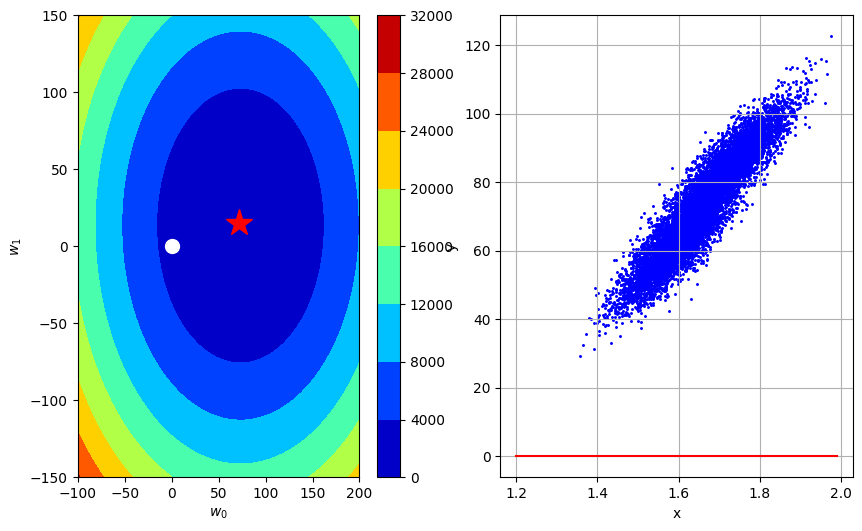

In [69]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [70]:
batch_iter(y, tx, 100, num_batches=1, shuffle=True)

<generator object batch_iter at 0x749362b8b880>

In [82]:
import random
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    e = y - np.dot(tx,w)
    grad = -1/y.shape[0]* np.dot(e.T,tx)
    return(grad)
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx,w)
            w = w - gamma*gradient
            minibatch_loss = compute_loss(minibatch_y, minibatch_tx, w)
           # print(
            #    f"SGD iter. {n_iter}, minibatch loss: {minibatch_loss}, w0={w[0]}, w1={w[1]}"
            #)
        # ***************************************************
        loss = compute_loss(y, tx, w)  # Compute the loss on the entire dataset
        ws.append(w)
        losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [83]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 10
gamma = 0.9
batch_size = 10000

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/9: loss=43.154396117732865, w0=65.96452980189467, w1=12.131741191490079
SGD iter. 1/9: loss=15.663572951318434, w0=72.56098278208414, w1=13.344915310639143
SGD iter. 2/9: loss=15.388664719654289, w0=73.22062808010308, w1=13.466232722554057
SGD iter. 3/9: loss=15.38591563733765, w0=73.28659260990497, w1=13.47836446374555
SGD iter. 4/9: loss=15.385888146514484, w0=73.29318906288516, w1=13.479577637864699
SGD iter. 5/9: loss=15.385887871606252, w0=73.29384870818319, w1=13.479698955276614
SGD iter. 6/9: loss=15.38588786885717, w0=73.29391467271299, w1=13.479711087017805
SGD iter. 7/9: loss=15.385887868829677, w0=73.29392126916596, w1=13.479712300191924
SGD iter. 8/9: loss=15.385887868829402, w0=73.29392192881127, w1=13.479712421509337
SGD iter. 9/9: loss=15.385887868829398, w0=73.2939219947758, w1=13.479712433641078
SGD: execution time=0.066 seconds


interactive(children=(IntSlider(value=1, description='n_iter', max=121, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

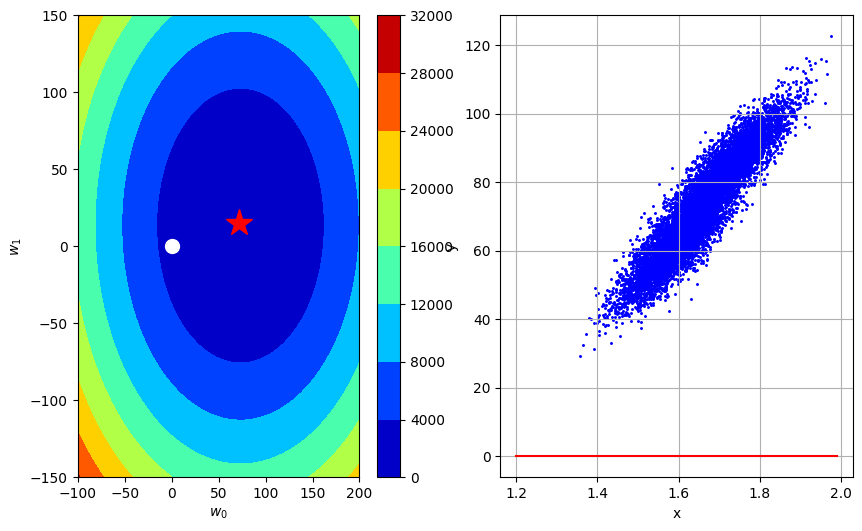

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

# 5. Effect of Outliers and MAE Cost Function

In [18]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [19]:
y.shape, tx.shape

((202,), (202, 2))

In [20]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))
# ***************************************************

SGD iter. 0/49: loss=2416.238697689188, w0=8.799862225778575, w1=9.23075054065566
SGD iter. 1/49: loss=1542.783379870666, w0=15.153443705301875, w1=12.453173406306199
SGD iter. 2/49: loss=894.4731601704332, w0=20.290417376176165, w1=7.95613330631452
SGD iter. 3/49: loss=1117.573816288416, w0=25.564395907373935, w1=8.953092502260988
SGD iter. 4/49: loss=1250.0021753179947, w0=31.210188605557228, w1=11.09432957012417
SGD iter. 5/49: loss=357.9412021761655, w0=35.515743980214744, w1=18.280490938046896
SGD iter. 6/49: loss=577.3556681029143, w0=39.54228962022983, w1=21.295686529516352
SGD iter. 7/49: loss=480.60720890704465, w0=43.938204127940274, w1=15.161517659836687
SGD iter. 8/49: loss=308.956490772016, w0=46.71119800304837, w1=15.685706699996542
SGD iter. 9/49: loss=360.5995728294735, w0=49.917616627583435, w1=18.21972063215287
SGD iter. 10/49: loss=106.66413385939374, w0=51.552269820402444, w1=18.63621186738081
SGD iter. 11/49: loss=178.9186251071673, w0=53.67382772773266, w1=19.2497

interactive(children=(IntSlider(value=1, description='n_iter', max=11, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

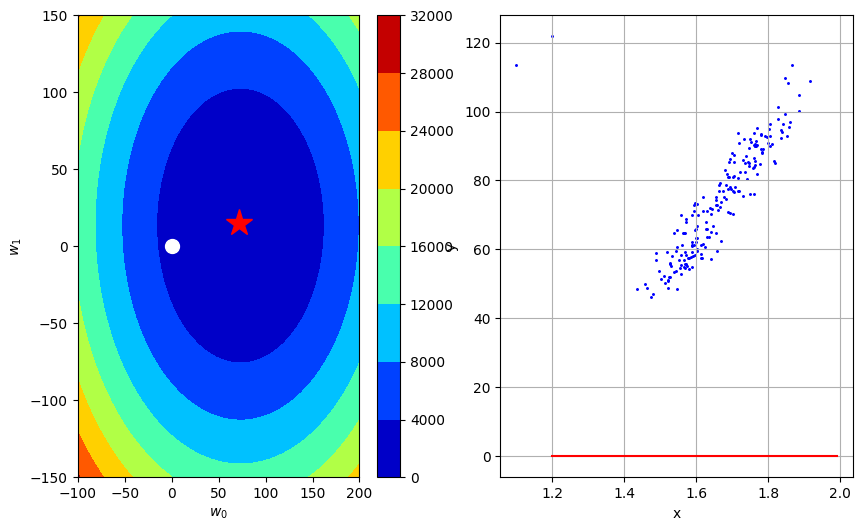

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [ ]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    raise NotImplementedError

In [ ]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        raise NotImplementedError

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [ ]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        raise NotImplementedError

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))